In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from librosa import display
from IPython.display import Audio

from matplotlib import cm;
from mpl_toolkits.mplot3d import Axes3D;
plt.interactive(True)

sys.path.append('/home/ci411/pcen-t-varying/')

from pcen_t.utils import *

In [3]:
filename = 'soundscape_train_bimodal1798_bedroom'

test_audio_loc = '/beegfs/ci411/pcen/reverb_pitch_URBAN-SED/audio/train/{}_0.wav'.format(filename)
test_pcen_loc = '/beegfs/ci411/pcen/features_807/pcen/URBAN-SED_bedroom/train/{}_0.h5'.format(filename)
test_mel_loc = '/beegfs/ci411/pcen/features_807/mel/URBAN-SED_bedroom/train/{}_0.h5'.format(filename)

In [4]:
audio, sr = lr.load(test_audio_loc)
pcen_data = load_h5(test_pcen_loc)
mel_data = load_h5(test_mel_loc)
#pcen_data2 = load_h5(test_pcen_loc2)

In [26]:
Audio(audio, rate=sr)

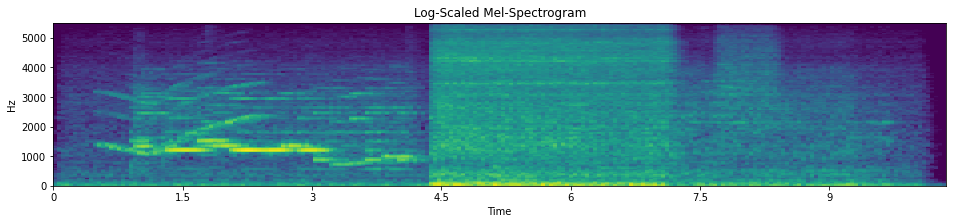

In [32]:
fig= plt.figure(figsize=(16,3))

lr.display.specshow(mel_data['Mel/mag'][0,:,:,0].T, sr=sr/2, x_axis='time', y_axis='hz', cmap='viridis', ax=plt.gca())
plt.title('Log-Scaled Mel-Spectrogram')
plt.savefig('figs/mel_spec.png')

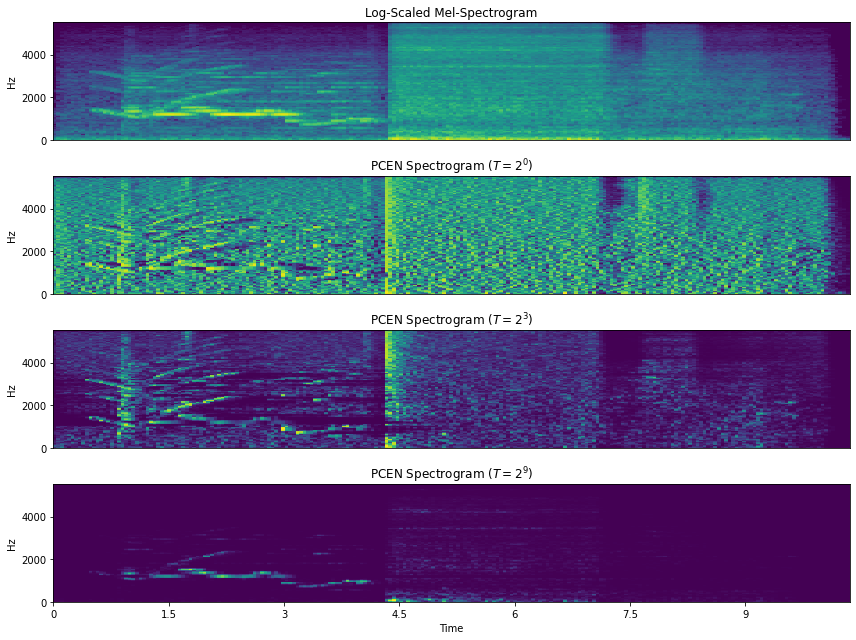

In [35]:
fig, ax = plt.subplots(nrows=4, figsize=(12,9))
lr.display.specshow(mel_data['Mel/mag'][0,:,:,0].T, sr=sr/2, x_axis='time', y_axis='hz', cmap='viridis', ax=ax[0])
lr.display.specshow(pcen_data['PCEN/mag'][0,:,:,0].T, sr=sr/2, x_axis='time', y_axis='hz', cmap='viridis', ax=ax[1])
lr.display.specshow(pcen_data['PCEN/mag'][0,:,:,3].T, sr=sr/2, x_axis='time', y_axis='hz', cmap='viridis', ax=ax[2])
lr.display.specshow(pcen_data['PCEN/mag'][0,:,:,9].T, sr=sr/2, x_axis='time', y_axis='hz', cmap='viridis', ax=ax[3])


subplot_bounds = list(ax[2].bbox.bounds)
new_bounds = np.array(subplot_bounds) + np.array([.1, .1, -.1, -.1])
#ax_new = fig.add_axes(new_bounds)
#lr.display.specshow(pcen_data['PCEN/mag'][0,:,:,2].T, sr=sr/4, x_axis='time', y_axis='hz', cmap='inferno', ax=ax_new)


ax[0].set_title('Log-Scaled Mel-Spectrogram')
ax[0].set_xticks([])
ax[0].set_xlabel('')
ax[1].set_title(r'PCEN Spectrogram ($T=2^0$)')
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[2].set_title(r'PCEN Spectrogram ($T=2^3$)')
ax[2].set_xticks([])
ax[2].set_xlabel('')
ax[3].set_title(r'PCEN Spectrogram ($T=2^9$)')
fig.tight_layout()
plt.savefig('figs/pcen_compare.png')

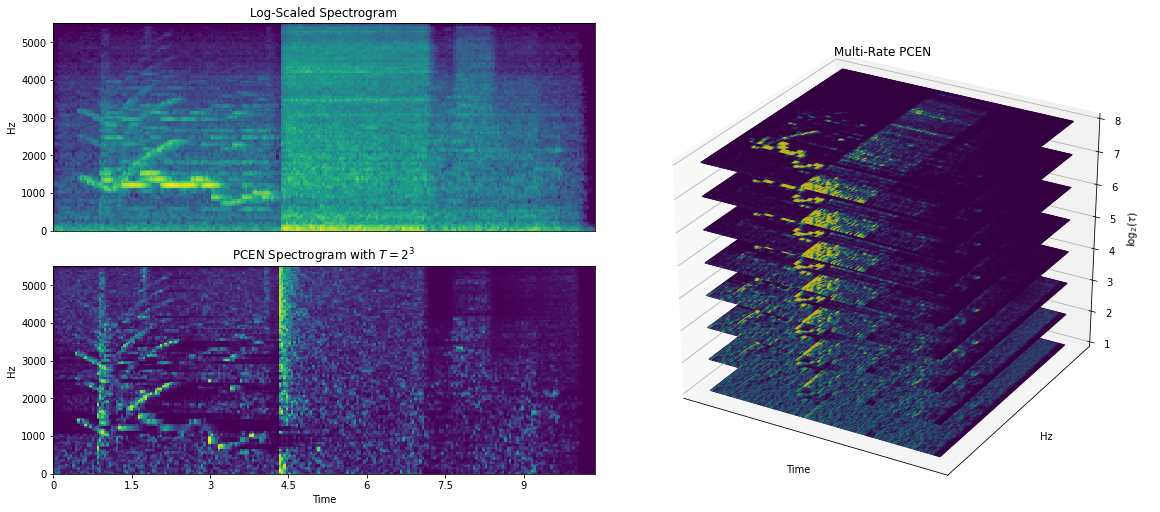

In [37]:
fig = plt.figure(constrained_layout=True, figsize=(16,7))
gs = fig.add_gridspec(3, 2)
ax0 = fig.add_subplot(gs[0,:1])
ax0.set_title('Log-Scaled Spectrogram')
lr.display.specshow(mel_data['Mel/mag'][0,:,:,0].T, sr=sr/2, x_axis='time', y_axis='hz', cmap='viridis', ax=ax0)
ax0.set_xticks([])
ax0.set_xlabel('')

ax1 = fig.add_subplot(gs[1,:1])
ax1.set_title(r'PCEN Spectrogram with $T=2^3$')
lr.display.specshow(pcen_data['PCEN/mag'][0,:,:,3].T, sr=sr/2, x_axis='time', y_axis='hz', cmap='viridis', ax=ax1)

ax2 = fig.add_subplot(gs[:,-1], projection='3d')
data_shape = pcen_data['PCEN/mag'][0,:,:,0].shape
X = np.arange(data_shape[0])
Y = np.arange(data_shape[1])
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X)

spacing = .03
for i in range(8):
    ax2.plot_surface(X, Y, Z+i+1, rstride=1, cstride=1, facecolors = cm.viridis(pcen_data['PCEN/mag'][0,:,:,i+1].T))

ax2.set_xticks([])
ax2.set_xlabel('Time')
ax2.set_yticks([])
ax2.set_ylabel('Hz') 
ax2.set_zlabel(r'$\log_2(\tau)$')
ax2.set_title('Multi-Rate PCEN')
plt.savefig('figs/spec_demo.png')

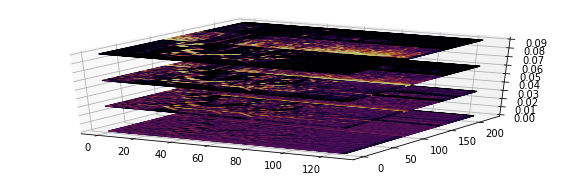

In [8]:
data_shape = pcen_data['PCEN/mag'][0,:,:,0].T.shape
X = np.arange(data_shape[0])
Y = np.arange(data_shape[1])
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X)

fig = plt.figure(figsize=(10,3));
ax = fig.gca(projection='3d')
spacing = .03
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors = cm.inferno(pcen_data['PCEN/mag'][0,:,:,0]));
ax.plot_surface(X, Y, Z+(1*spacing), rstride=1, cstride=1, facecolors = cm.inferno(pcen_data['PCEN/mag'][0,:,:,2]));
ax.plot_surface(X, Y, Z+(2*spacing), rstride=1, cstride=1, facecolors = cm.inferno(pcen_data['PCEN/mag'][0,:,:,4]));
ax.plot_surface(X, Y, Z+(3*spacing), rstride=1, cstride=1, facecolors = cm.inferno(pcen_data['PCEN/mag'][0,:,:,6]));



In [32]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

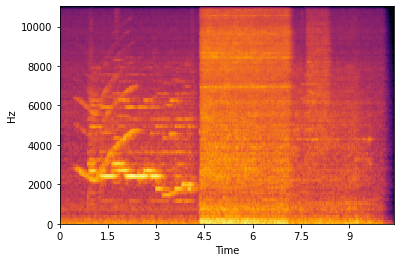

In [19]:
S = lr.feature.melspectrogram(y=audio, sr=sr, n_mels = 128)
lr.display.specshow(np.log(S), sr=sr, x_axis='time', y_axis='hz', cmap='inferno')

In [7]:
pcen_pump_loc = '/beegfs/ci411/pcen/pumps/pcen/pump.pkl'
mel_pump_loc = '/beegfs/ci411/pcen/pumps/mel/pump.pkl'

pcen_pump = load_pump(pcen_pump_loc)
mel_pump = load_pump(mel_pump_loc)

In [8]:
transformed_audio['Mel/mag'][]

SyntaxError: invalid syntax (<ipython-input-8-9274e6e33897>, line 1)

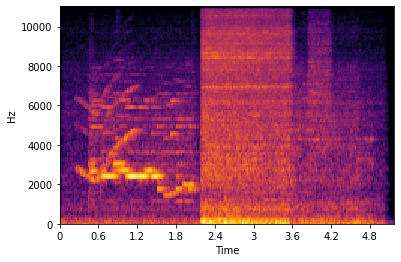

In [93]:
transformed_audio = mel_pump.transform(test_audio_loc)
lr.display.specshow(transformed_audio['Mel/mag'][0,:,:].T, sr=sr, x_axis='time', y_axis='hz', cmap='inferno')

In [83]:
transformed_audio['Mel/mag'].shape

(1, 223, 128)